In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

fc-list: /home/tinzog/anaconda3/envs/AI/lib/libuuid.so.1: no version information available (required by /lib/x86_64-linux-gnu/libfontconfig.so.1)
fc-list: /home/tinzog/anaconda3/envs/AI/lib/libuuid.so.1: no version information available (required by /lib/x86_64-linux-gnu/libfontconfig.so.1)


In [2]:
# Input
taste       = ctrl.Antecedent(np.linspace(0, 10, 100), 'Taste')
environment = ctrl.Antecedent(np.linspace(0, 10, 100), 'Environment')
budget      = ctrl.Antecedent(np.linspace(0, 9 , 100), 'Budget')
userReview  = ctrl.Antecedent(np.linspace(0, 5 , 100), 'User Review')
location    = ctrl.Antecedent(np.linspace(0, 3 , 100), 'Location')

# Output 
preference = ctrl.Consequent(np.linspace(0, 15, 100), 'Preference')

In [3]:
# Membership functions
taste[1] = fuzz.gaussmf(taste.universe, 0, 2)
taste[2] = fuzz.gaussmf(taste.universe, 5, 2)
taste[3] = fuzz.gaussmf(taste.universe, 10, 2)

environment[1] = fuzz.gaussmf(environment.universe, 0, 2)
environment[2] = fuzz.gaussmf(environment.universe, 5, 2)
environment[3] = fuzz.gaussmf(environment.universe, 10, 2)

budget[3] = fuzz.gaussmf(budget.universe, 0, 1)
budget[2] = fuzz.gaussmf(budget.universe, 4.5, 1)
budget[1] = fuzz.gaussmf(budget.universe, 9, 1)

userReview[1] = fuzz.gaussmf(userReview.universe, 0, 0.5)
userReview[2] = fuzz.gaussmf(userReview.universe, 2.5, 0.5)
userReview[3] = fuzz.gaussmf(userReview.universe, 5, 0.5)

location[3] = fuzz.gaussmf(location.universe, 0, 0.5)
location[2] = fuzz.gaussmf(location.universe, 1.5, 0.5)
location[1] = fuzz.gaussmf(location.universe, 3, 0.5)

preference[1] = fuzz.gaussmf(preference.universe, 1.5, 1)
preference[2] = fuzz.gaussmf(preference.universe, 4.5, 1)
preference[3] = fuzz.gaussmf(preference.universe, 7.5, 1)
preference[4] = fuzz.gaussmf(preference.universe, 10.5, 1)
preference[5] = fuzz.gaussmf(preference.universe, 13.5, 1)


/home/tinzog/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


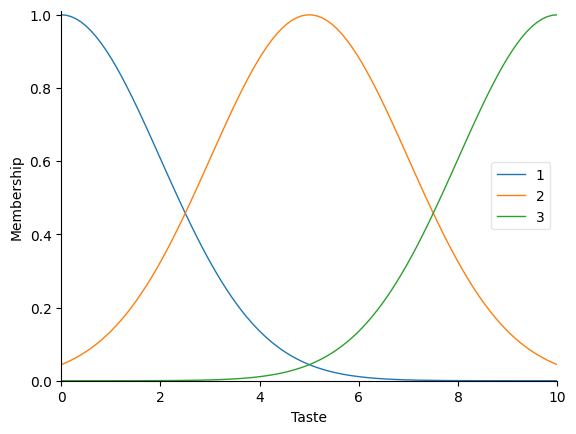

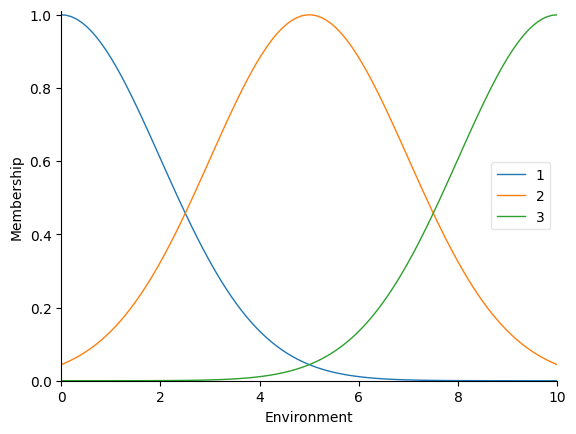

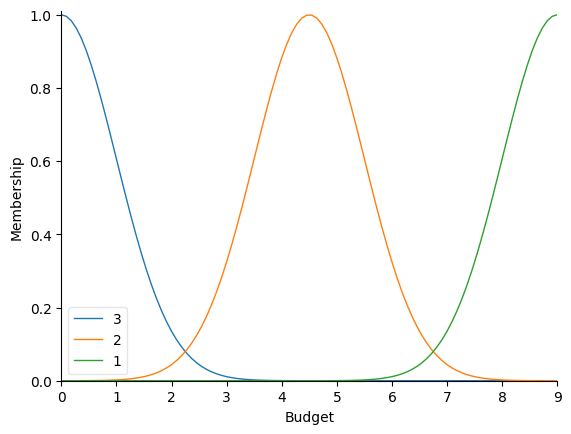

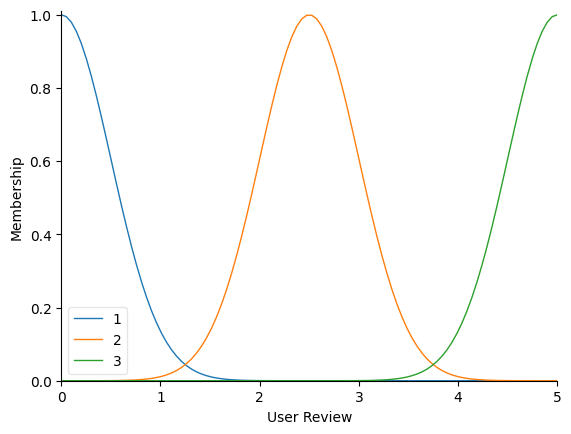

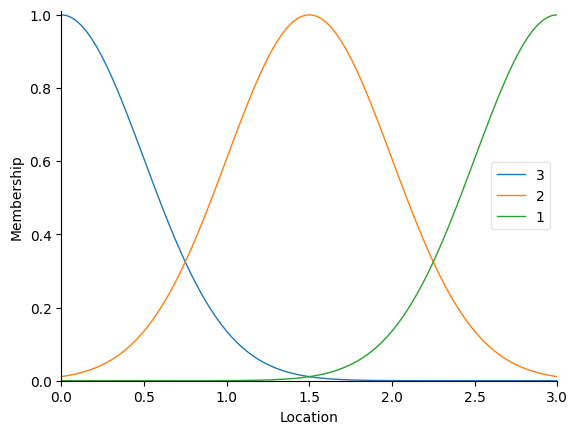

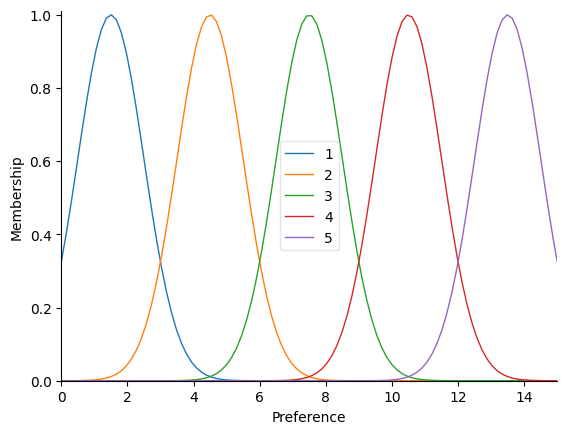

In [4]:
taste.view()
environment.view()
budget.view()
userReview.view()
location.view()

preference.view()

In [5]:
# Rules
rule = []
value = [1, 2, 3]

for i1 in value:
    for i2 in value:
        for i3 in value:
            for i4 in value:
                for i5 in value:
                    lvl = (i1 + i2 + i3 + i4 + i5) // 3
                    rule.append(ctrl.Rule(taste[i1] & environment[i2] & budget[i3] & userReview[i4] & location[i5], preference[lvl]))

In [6]:
#Control system
preferrence_control = ctrl.ControlSystem(rule)
preference_simulation = ctrl.ControlSystemSimulation(preferrence_control)

10.854328172198876


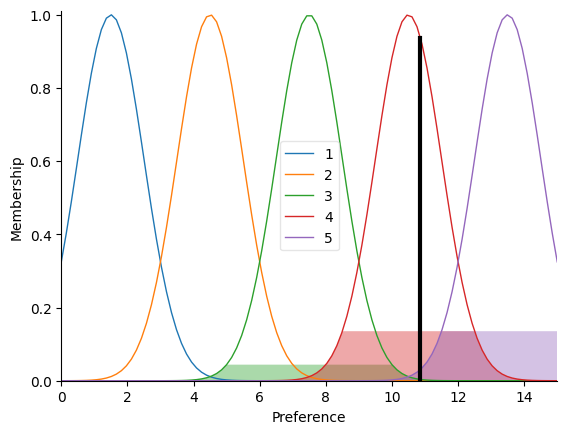

In [7]:
# Compute
preference_simulation.input['Taste'] = 8
preference_simulation.input['Environment'] = 7
preference_simulation.input['Budget'] = 2
preference_simulation.input['User Review'] = 5
preference_simulation.input['Location'] = 1

preference_simulation.compute()
print(preference_simulation.output['Preference'])

# Rainfall
preference.view(sim = preference_simulation)